In [1]:
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
from scipy.spatial import distance

import glob

In [38]:
folder_name = './vectors/04256520_db7851745fb04cf732388c13cc4a0ba3'

In [39]:
name2vector_dict = {}
for vector_path in glob.glob(f'{folder_name}/*.npy'):
    f_name = vector_path.split('/')[-1].split('.')[0]
    arr = np.load(vector_path)
    name2vector_dict[f_name] = arr

In [40]:
cosine_vector_name2each_dict = {}
for k1,v1 in name2vector_dict.items():
    cosine_vector_name2each_dict[k1] = {}
    for k2,v2 in name2vector_dict.items():
        if k1 == k2:
            continue
        sim = 1 - distance.cosine(v1, v2)
        cosine_vector_name2each_dict[k1][k2] = sim

In [41]:
order_expected = [
    'voxel', 'origin',
    'resnet18', 'resnet18bn',
    'resnet34', 'resnet34bn',
    'resnet50', 
    'new_loss_origin', 'new_loss_resnet50',
]

used_names_list = []

heatmap_matrix = []
for raw_name in order_expected:
    if cosine_vector_name2each_dict.get(raw_name) is None:
        continue
    used_names_list.append(raw_name)
    heatmap_matrix_cal = []
    for cal_name in order_expected:
        if cosine_vector_name2each_dict[raw_name].get(cal_name) is None:
            if cal_name == raw_name:
                heatmap_matrix_cal.append(1.0)
            continue
        heatmap_matrix_cal.append(
            cosine_vector_name2each_dict[raw_name][cal_name]
        )
    heatmap_matrix.append(heatmap_matrix_cal)
heatmap_matrix = np.asarray(heatmap_matrix, dtype=np.float32)

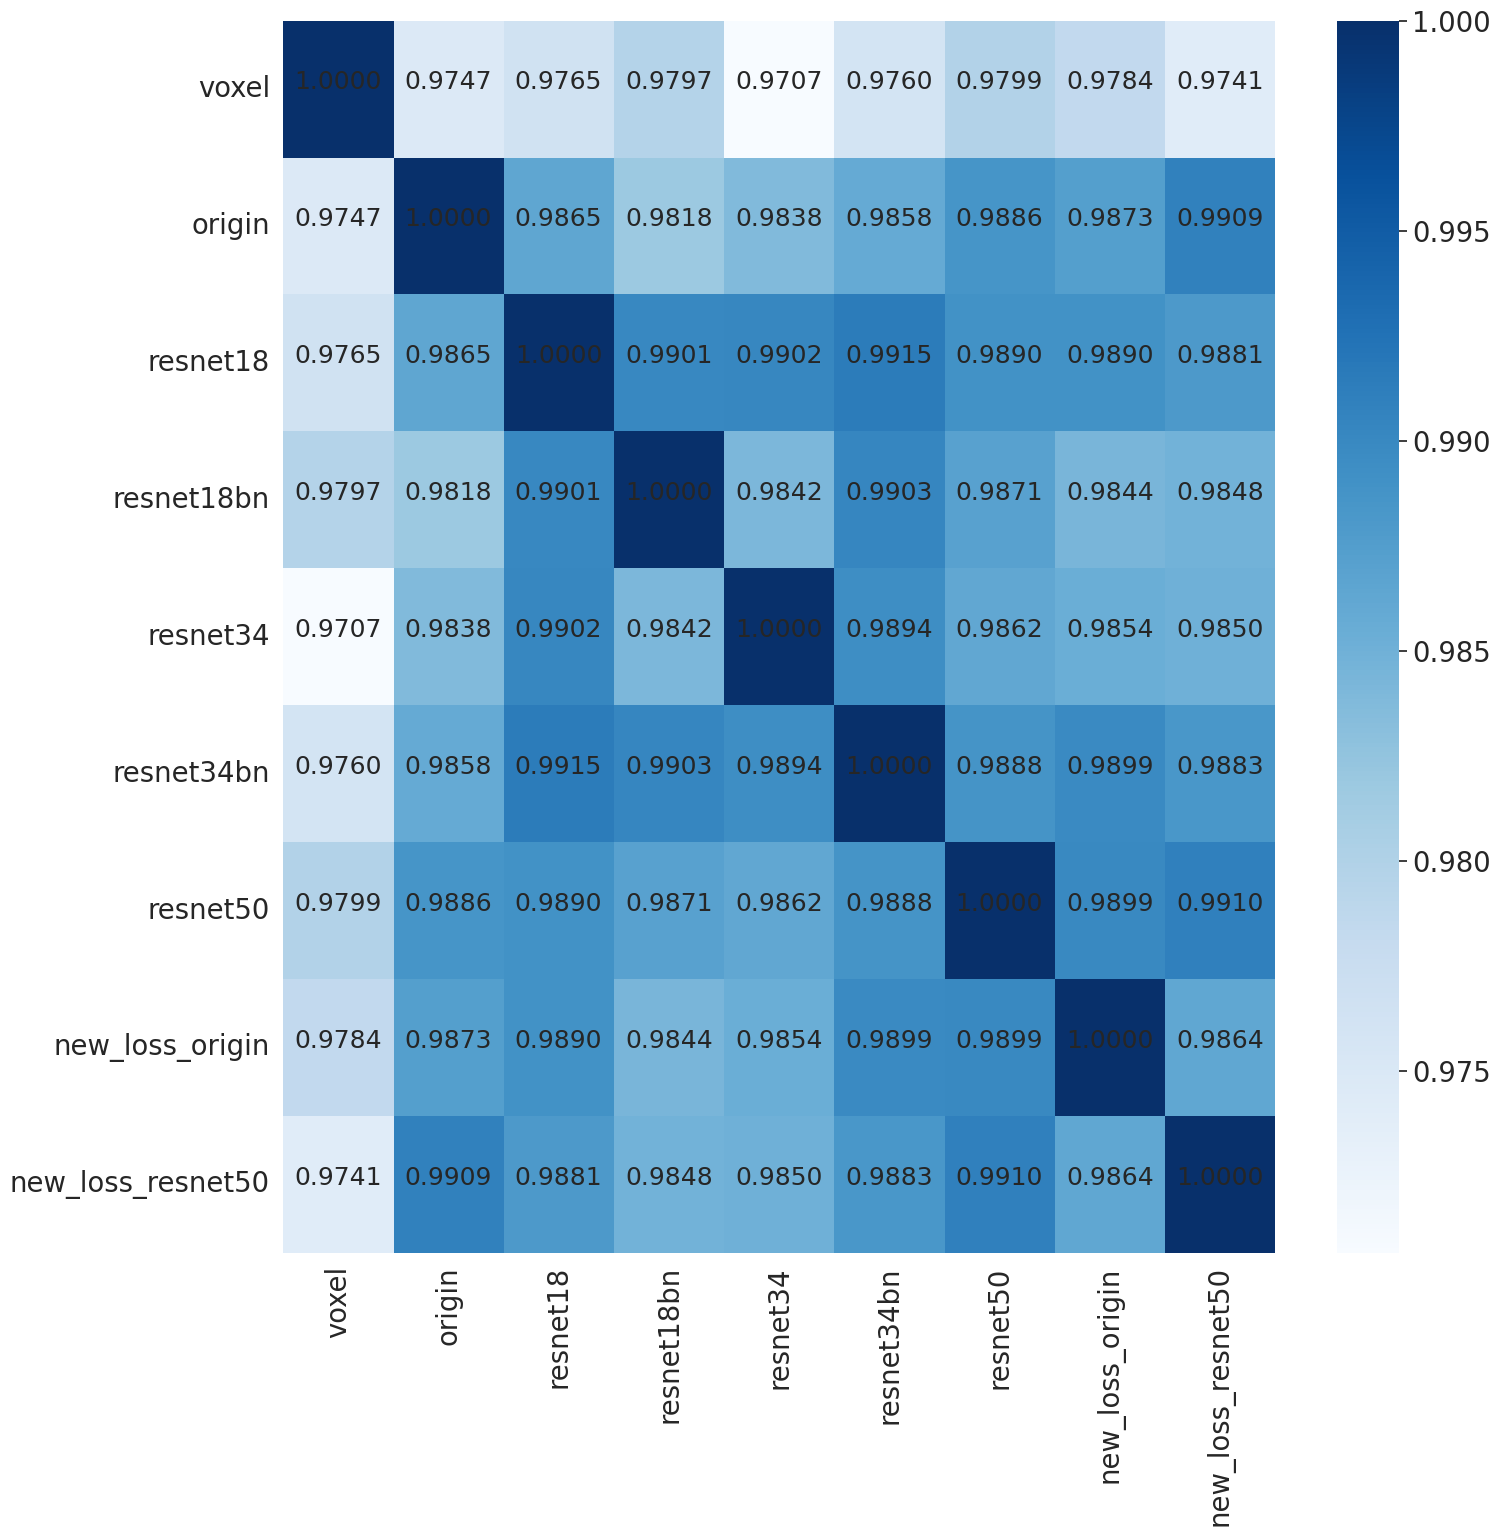

In [42]:
fig = plt.figure(figsize=(16,16))
sns.set(font_scale=1.8)
ax = sns.heatmap(
    heatmap_matrix, 
    xticklabels=used_names_list, yticklabels=used_names_list, \
    cmap="Blues"
)

for i, x in enumerate(ax.get_xticks()):
    for j,y in enumerate(ax.get_yticks()):
        val = round(heatmap_matrix[j,i], 4)
        ax.text(x-0.4,y, "{:.4f}".format(val), fontsize=18)
plt.savefig('./vectors/tmpfig.svg', bbox_inches='tight', transparent="True", pad_inches=0)

In [30]:
heatmap_matrix.max(), heatmap_matrix.min()

(1.0, 0.9755436)

In [49]:
v1 = np.load('./vectors/chair-real-world/resnet50.npy')
v2 = np.load('./vectors/chair-real-world/resnet50.npy')

In [50]:
sim = 1 - distance.cosine(v1, v2)
sim

1.0